# processing data

In [1]:
from pandas import read_csv
from json import load, dump

df = read_csv('GAME Sequencing/taxonomy.tsv', sep='\t').set_index('Feature ID')
df 

,Taxon,Confidence
Feature ID,,
a5ad9574a1f8aea06b6dfaff6eddfff7,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.876989
a27f37aae2a34101f8a61c6f0b1cd246,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.812380
6589433bc08b7cdc5ea1e4928683ed00,k__Bacteria; p__Actinobacteriota; c__Actinobac...,0.978255
38b371de3be6ddef03bea94294e9830d,k__Archaea; p__Euryarchaeota; c__Methanobacter...,0.872175
1b976cc787b3465ddcc891c15c968a9b,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999524
...,...,...
31c50a4d3207815f673d3edebf772af3,k__Bacteria; p__Planctomycetota; c__Planctomyc...,0.986020
36090a0d50aa4bbbffdd4b9953b0c500,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767113
a35cb9ab8e98072e9a43f7285279bcde,k__Bacteria; p__Firmicutes; c__Dethiobacteria;...,0.999985


In [4]:
df.to_json('taxonomy.json')

js=load(open('taxonomy.json','r'))
js.keys()

dict_keys(['Taxon', 'Confidence'])

In [5]:
definitions = {'k': 'Kingdom', 'p': 'Phylum', 'c': 'Class', 'o': 'Order', 'f': 'Family', 'g': 'Genus', 's': 'Species'}


print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])
for asv in js['Taxon']:
    dic = {}
    print(asv)
    for p in js['Taxon'][asv].split('; '): 
        content = p.split('__')
        # print(content)
        content[0] = definitions[content[0]] 
        # print('\n')
        # print(dict(content))
        dic[content[0]] = content[1]
    js['Taxon'][asv] = dic

print(js['Taxon']['a5ad9574a1f8aea06b6dfaff6eddfff7'])

k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Halomonadaceae; g__Halomonas; s__midas_s_110869
a5ad9574a1f8aea06b6dfaff6eddfff7
a27f37aae2a34101f8a61c6f0b1cd246
6589433bc08b7cdc5ea1e4928683ed00
38b371de3be6ddef03bea94294e9830d
1b976cc787b3465ddcc891c15c968a9b
3dd54183eecfa8bb215520814056e4b0
1240eb67c8c5004296a23b80d1a10296
016c815a4508d59f5cd00df84f95fa5d
a353b92733af5260a57dd1a0ba3001e1
9ab23c4d99ca81eaa9c30826e3201dd4
e95282c3197d4315d84f31d177642c58
076b820e5b709e62b933f76ab6c45254
3ade0fa13e56aac194bb3373200d6def
b96715d4c2e39e415550cf66da8a67f5
3487ee381e9bba57861b67ac3936d665
08ea1c9b9d368cd6d9bfeb8857e90315
fd95b1c4fe440dbd2ad6a10e70f8ae45
308aa3982d3c398eaae8efce7b0803f2
cd05a4b1cda569ae366c6980823f4c72
07246a1fc2c2fed9e54374f5ee46c333
8c86a02bd0f2c7a90bb40b735577a623
e561c5c5f92aa66e6b1befb81385d1fc
ae72db992b92b97750fc6662153b5369
64fc10f0a6641c24f1fc81c23d55d3b7
cd1f95189b8375347f827f4a8b08dcf7
b65ddb808f41ed58f0a87829f790124c
07e00e1bcc9d9a3

In [6]:
dump(js, open('new_taxonomy.json', 'w'), indent=3)
js

{'Taxon': {'a5ad9574a1f8aea06b6dfaff6eddfff7': {'Kingdom': 'Bacteria',
   'Phylum': 'Proteobacteria',
   'Class': 'Gammaproteobacteria',
   'Order': 'Pseudomonadales',
   'Family': 'Halomonadaceae',
   'Genus': 'Halomonas',
   'Species': 'midas_s_110869'},
  'a27f37aae2a34101f8a61c6f0b1cd246': {'Kingdom': 'Bacteria',
   'Phylum': 'Firmicutes',
   'Class': 'Clostridia',
   'Order': 'Peptostreptococcales-Tissierellales',
   'Family': 'Serpentinicella',
   'Genus': 'midas_g_75908'},
  '6589433bc08b7cdc5ea1e4928683ed00': {'Kingdom': 'Bacteria',
   'Phylum': 'Actinobacteriota',
   'Class': 'Actinobacteria',
   'Order': 'Corynebacteriales',
   'Family': 'Corynebacteriaceae',
   'Genus': 'Corynebacterium',
   'Species': 'midas_s_5929'},
  '38b371de3be6ddef03bea94294e9830d': {'Kingdom': 'Archaea',
   'Phylum': 'Euryarchaeota',
   'Class': 'Methanobacteria',
   'Order': 'Methanobacteriales',
   'Family': 'Methanobacteriaceae',
   'Genus': 'Methanobacterium',
   'Species': 'Methanobacterium_beij

In [7]:
ab = read_csv("GAME Sequencing/ASV_abundance_wideform.csv").set_index("seq")
ab

,1AB,2AB,3AB,4AB,5AB,6AB,7AB
seq,,,,,,,
63f37ee4b481fccdffca10160ed5b944,1.305925,0.000000,0.157978,0.000000,0.0,0.000000,0.291133
ed12d6c2cccee9737fcf027c28dc1504,0.024184,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
a353b92733af5260a57dd1a0ba3001e1,9.014510,0.000000,2.148499,0.000000,0.0,0.000000,2.054567
38b371de3be6ddef03bea94294e9830d,13.494559,0.000000,3.775671,0.028239,0.0,2.449694,12.069539
28f9a25539c92bd0c608d3c9cec7991b,0.912938,0.000000,0.363349,0.000000,0.0,0.000000,0.956580
...,...,...,...,...,...,...,...
58110345812f524d9a669d08b86d638e,0.000000,0.039785,0.000000,0.000000,0.0,0.000000,0.000000
e27e3671c48f3fc26fc25bfb66487cbc,0.000000,0.019893,0.000000,0.000000,0.0,0.000000,0.000000
a77c9d2b8200bef0d694237279a593f8,0.000000,0.049731,0.000000,0.000000,0.0,0.000000,0.000000


In [8]:
ab.to_json('abundance.json')

ab_js=load(open('abundance.json','r'))
ab_js.keys()

ab_js

{'1AB': {'63f37ee4b481fccdffca10160ed5b944': 1.30592503,
  'ed12d6c2cccee9737fcf027c28dc1504': 0.024183797,
  'a353b92733af5260a57dd1a0ba3001e1': 9.014510278,
  '38b371de3be6ddef03bea94294e9830d': 13.49455865,
  '28f9a25539c92bd0c608d3c9cec7991b': 0.912938331,
  '7281c911136ba2bdcafebb9c71729dea': 0.0,
  'c39f594d9d2493b66260c1f7503e5ea1': 0.399032648,
  'c4112b995ef6cd2f05559f6a3057bc7c': 0.0,
  'c54740e67850b527400a77af33bd3d89': 0.0,
  'fa8e5e27d8fba25e37fc05340a105914': 0.0,
  '326834f69c357dad79f31e792597dd1d': 0.0,
  '89056b9f86a0886730db47a8c45825eb': 0.0,
  '7d61548814c2806bca7f46e5de082b7e': 0.030229746,
  'e472b9258609f8985c34fb3e8706f692': 0.0,
  '532ff193b68d71a9e2229dd125e1eeb1': 0.0,
  '702860fda44c0d44ddacb5bd79fd5d24': 0.15114873,
  '4c301bbaaa0d8e3dc3356271c20fc5b5': 0.0,
  '8dba5d94c21557246f8c48418b0f3bda': 0.0,
  '73a1573f73ae093cf73af7ee45962885': 0.0,
  '35796c6b949f569e7a6af67f9e7cea60': 0.0,
  'bde5589b9ad383774dab7d2e122e1a20': 0.0,
  '82f3d62aabc8caf816ec2120e

In [9]:
md = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/GAME_Metadata.csv").set_index("sample")
md

,date,days
sample,,
1AB,9.11.23,45.0
2AB,7.73.23,1.0
3AB,10.2.22,66.0
4AB,8.24.23,25.0
5AB,10.15.23,79.0
6AB,10.15.23,81.0
7AB,5.10.24,NaN


In [10]:
md.T.to_json('metadata.json')

md_js=load(open('metadata.json','r'))

md_js.keys()

md_js

{'1AB': {'date': '9.11.23', 'days': 45.0},
 '2AB': {'date': '7.73.23', 'days': 1.0},
 '3AB': {'date': '10.2.22', 'days': 66.0},
 '4AB': {'date': '8.24.23', 'days': 25.0},
 '5AB': {'date': '10.15.23', 'days': 79.0},
 '6AB': {'date': '10.15.23', 'days': 81.0},
 '7AB': {'date': '5.10.24', 'days': None}}

# visualizing data

1AB


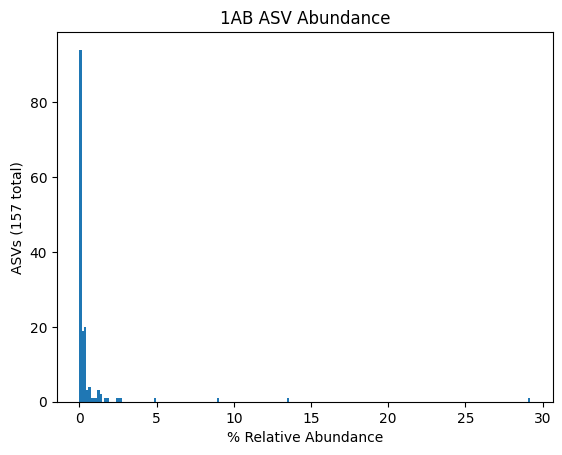

2AB


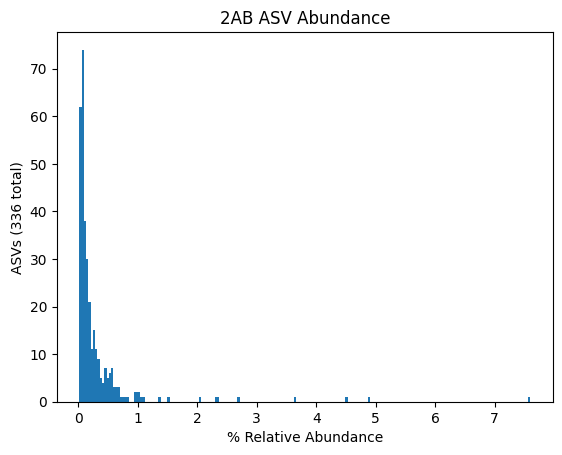

3AB


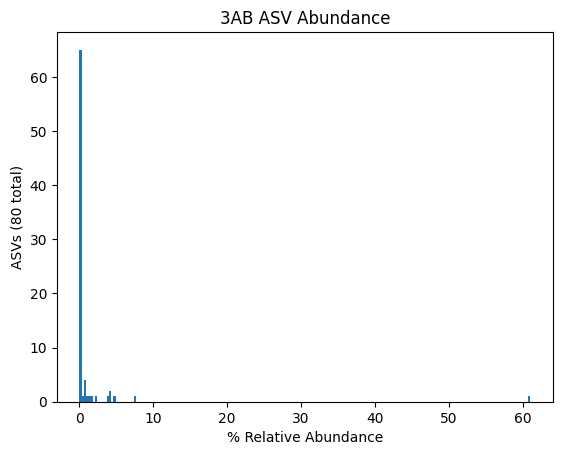

4AB


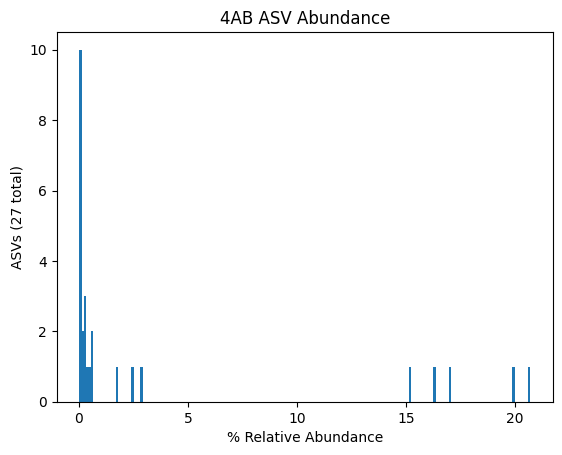

5AB


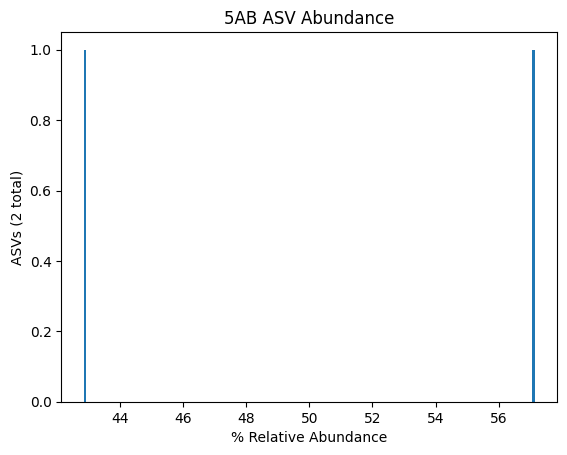

6AB


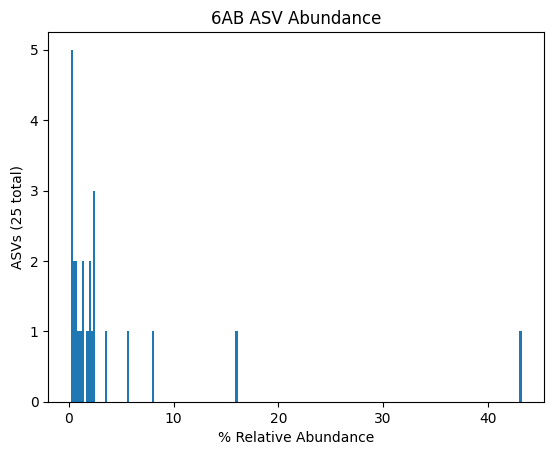

7AB


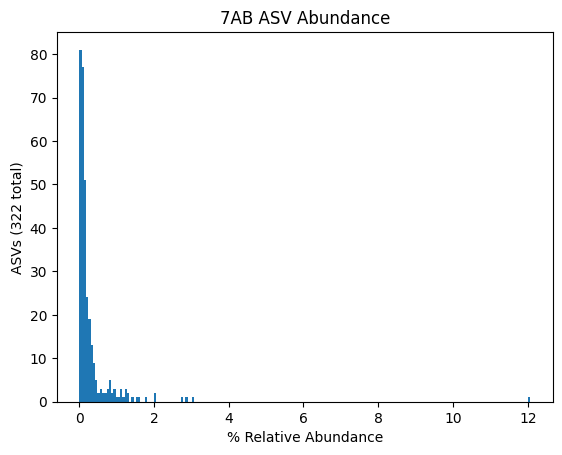

In [11]:
from matplotlib import pyplot as plt

from numpy import array 
for sample, content in ab_js.items() : 
    print(sample)
    abundances = array([x for x in list(content.values()) if x > 0])
    # print(len(abundances))

    plt.hist(abundances, bins=200)

    # Add labels and title
    plt.xlabel('% Relative Abundance')
    plt.ylabel(f'ASVs ({len(abundances)} total)')
    plt.title(f'{sample} ASV Abundance')

    # Display the plot
    plt.show()

In [12]:
# import csv
# import numpy as np
# from collections import Counter
# from matplotlib import pyplot as pyplot

# with open("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/GAME_Metadata.csv") as csv_file:
#     csv_reader = csv.DictReader(csv_file)


## functional Grouping and taxonomy 

In [13]:
# {
#     'Archaea': {
#         "Euryarchaeota": {
#             "Hydrogenotrophic/Acetoclastic": "Y",
#             "Methanobacteria": {
#                 "Methanobacteriales":{
#                     "Methanobacteriaceae":{
#                         "Methanobacterium":{
#                             "Methanobacterium_beijingense": {

#                             }, 
#                             "midas_3006": {

#                             }
#                         }
#                     }
#                 }

#             }

#         }
#     }
# }

In [14]:
taxa = "Phylum"

taxa_asvs = {}
for asv, taxonomy in js['Taxon'].items():
    if taxonomy.get(taxa, 'none') not in taxa_asvs:
        taxa_asvs[taxonomy.get(taxa, 'none')] = []
    taxa_asvs[taxonomy.get(taxa, 'none')].append(asv)



for taxon, asvs in taxa_asvs.items():
    print(taxon, len(asvs))


#display(taxa_asvs["none"])

# for sample, abundances in ab.items():
#     print(sample)  
#     for asv, abundance in abundances.items():


NameError: name 'js' is not defined

## ploting from chat

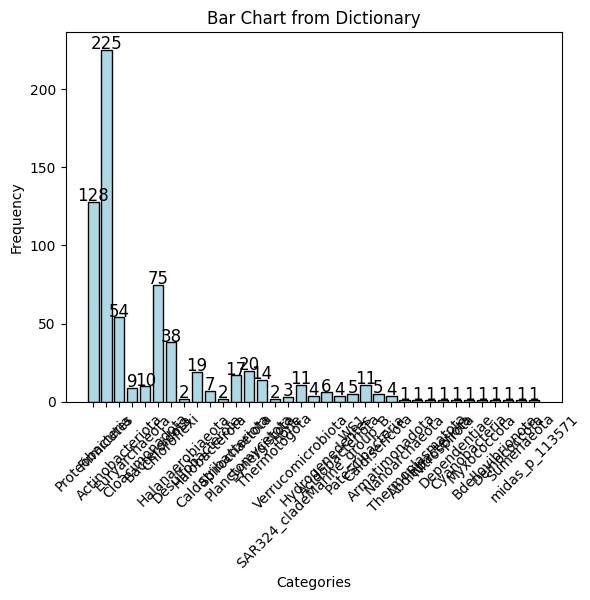

In [15]:

# Create the bar chart
plt.bar(list(taxa_asvs.keys()), list([len(x) for x in taxa_asvs.values()]), color='lightblue', edgecolor='black')

# Add labels on top of each bar
for i, value in enumerate(list([len(x) for x in taxa_asvs.values()])):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12, color='black')

# Add labels and title
plt.xlabel(taxa)
plt.ylabel(f"Frequency ({len(asvs)} total)")
plt.title("")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [16]:
#Visualizin Functionality

ft = read_csv('C:/Users/danie/OneDrive/Desktop/GAME Sequencing/FunctionalityTable_Genus.csv').set_index('seq')
display(ft)

# ft.to_json('Functionality.json')

# ft_js=load(open('Functionality.json', 'r'))
# ft_js.keys()

# ft_js

new_dict = {}
for seq, row in ft.iterrows():
    sample = row["sample"]
    if sample not in new_dict:
         new_dict[sample] = {}
    new_dict[sample][seq] = {
          "genus": row["Genus"],
          "metabolism": row["Metabolism"],
          "abundance": row["sum_ab"]
     }
from json import dump
dump(new_dict, open("Functionalities.json", 'w'), indent=3)

In [17]:
sample_met = {}
for sample, content in new_dict.items():
    metabolisms = {}
    for sequnce, content2 in content.items():
        met = content2["metabolism"]
        if met not in metabolisms:
            metabolisms[met] = []
        metabolisms[met].append(content2["abundance"])
    sample_met[sample] = metabolisms

#display(sample_met)
    
for sample, metabolisms in sample_met.items():
    print(sample)
    for met, abundances in metabolisms.items():

        print(met, len(abundances), sum(abundances))
    print()

sample_met

1AB
Hydrogenotroph/Acetoclastic 7 23.84522370012094
Acetogen 4 0.0
nan 3 0.0
Hydrogenotroph/Formate 2 0.0
Hydrogenotroph 1 0.0

3AB
Hydrogenotroph/Acetoclastic 7 6.408636124275931
Acetogen 4 0.0
nan 3 0.0
Hydrogenotroph/Formate 2 0.0
Hydrogenotroph 1 0.0

4AB
Hydrogenotroph/Acetoclastic 7 0.0282386163078009
Acetogen 4 0.0
nan 3 0.0
Hydrogenotroph/Formate 2 0.0
Hydrogenotroph 1 0.0

5AB
Acetogen 4 0.0
nan 3 0.0
Hydrogenotroph/Acetoclastic 7 0.0
Hydrogenotroph/Formate 2 0.0
Hydrogenotroph 1 0.0

6AB
Hydrogenotroph/Acetoclastic 7 2.44969378827647
Acetogen 4 0.0
nan 3 0.0
Hydrogenotroph/Formate 2 0.0
Hydrogenotroph 1 0.0

7AB
Hydrogenotroph/Acetoclastic 7 16.64448511063046
Hydrogenotroph/Formate 2 0.16636167027117
Hydrogenotroph 1 0.124771252703377
Acetogen 4 0.0499085010813509
nan 3 0.0

2AB
Acetogen 4 1.1537696439228187
nan 3 0.5868311119952258
Hydrogenotroph/Formate 2 0.477421921623235
Hydrogenotroph/Acetoclastic 7 0.218818380743982
Hydrogenotroph 1 0.0



{'1AB': {'Hydrogenotroph/Acetoclastic': [13.4945586457074,
   9.01451027811366,
   0.912938331318017,
   0.399032648125756,
   0.0241837968561064,
   0.0,
   0.0],
  'Acetogen': [0.0, 0.0, 0.0, 0.0],
  nan: [0.0, 0.0, 0.0],
  'Hydrogenotroph/Formate': [0.0, 0.0],
  'Hydrogenotroph': [0.0]},
 '3AB': {'Hydrogenotroph/Acetoclastic': [3.77567140600316,
   2.14849921011058,
   0.363349131121643,
   0.121116377040548,
   0.0,
   0.0,
   0.0],
  'Acetogen': [0.0, 0.0, 0.0, 0.0],
  nan: [0.0, 0.0, 0.0],
  'Hydrogenotroph/Formate': [0.0, 0.0],
  'Hydrogenotroph': [0.0]},
 '4AB': {'Hydrogenotroph/Acetoclastic': [0.0282386163078009,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'Acetogen': [0.0, 0.0, 0.0, 0.0],
  nan: [0.0, 0.0, 0.0],
  'Hydrogenotroph/Formate': [0.0, 0.0],
  'Hydrogenotroph': [0.0]},
 '5AB': {'Acetogen': [0.0, 0.0, 0.0, 0.0],
  nan: [0.0, 0.0, 0.0],
  'Hydrogenotroph/Acetoclastic': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'Hydrogenotroph/Formate': [0.0, 0.0],
  'Hydrogenotrop

In [1]:
%run sludgecommutil.py

python version 3.12.3
KBBaseModules 0.0.1
modelseedpy 0.3.3
cobrakbase 0.3.1
Output files printed to:/home/freiburger/Documents/sludge/Sludge/nboutput when using KBDevUtils.output_dir


In [2]:
util.load("test")

1763065376.95153 ERROR: Requested data test doesn't exist at /home/freiburger/Documents/sludge/Sludge/datacache/test.json


ValueError: Requested data test doesn't exist at /home/freiburger/Documents/sludge/Sludge/datacache/test.json

In [ ]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the models
import cobrakbase
with open("/Users/andrewfreiburger/.kbase/token", 'r') as token_file:
    token = token_file.read().strip()
    kbase_api = cobrakbase.KBaseAPI(token)

media_ws = 207617
media = kbase_api.get_from_ws("media6", media_ws)   #This is Wolfe media, as determined by the presence of NTA
# display(media.data["mediacompounds"])
media_conc = {cpd["id"]: cpd["concentration"] for cpd in media.data["mediacompounds"]}
display(media_conc)

from modelseedpy import FBAHelper
FBA_media =FBAHelper.convert_kbase_media(media)
display(FBA_media)

{'cpd00254': 0.00075922,
 'cpd00063': 5.91e-05,
 'cpd00205': 0.00544,
 'cpd00034': 3.36e-06,
 'cpd00030': 5.71e-06,
 'cpd00149': 4.05e-06,
 'cpd19013': 0.018074,
 'cpd10515': 3.94e-05,
 'cpd00058': 3.85e-07,
 'cpd00099': 0.0296,
 'cpd00048': 4.84e-05,
 'cpd00009': 0.003788,
 'cpd09225': 1.56e-06,
 'cpd11574': 5.66e-06,
 'cpd00131': 5.658e-06,
 'cpd00547': 0.00010168,
 'cpd00104': 0.0001974,
 'cpd00393': 0.00010926,
 'cpd00263': 0.000570221,
 'cpd00220': 0.0002563,
 'cpd00218': 0.0007836,
 'cpd03424': 3.5584e-05,
 'cpd00541': 0.000233751,
 'cpd19112': 0.00020244,
 'cpd00971': 0.01074,
 'cpd00244': 4.06e-06,
 'cpd00443': 0.00070344,
 'cpd01079': 1.116e-05,
 'cpd03387': 1.12e-05,
 'cpd00305': 0.0003635,
 'cpd15574': 2.92e-06,
 'cpd00240': 0.000660205,
 'cpd00067': 0.00010168,
 'cpd10393': 5.63e-05,
 'cpd00074': 0.000321}

{'EX_cpd00254_e0': 1000,
 'EX_cpd00063_e0': 1000,
 'EX_cpd00205_e0': 1000,
 'EX_cpd00034_e0': 1000,
 'EX_cpd00030_e0': 1000,
 'EX_cpd00149_e0': 1000,
 'EX_cpd19013_e0': 1000,
 'EX_cpd10515_e0': 1000,
 'EX_cpd00058_e0': 1000,
 'EX_cpd00099_e0': 1000,
 'EX_cpd00048_e0': 1000,
 'EX_cpd00009_e0': 1000,
 'EX_cpd09225_e0': 1000,
 'EX_cpd11574_e0': 1000,
 'EX_cpd00131_e0': 1000,
 'EX_cpd00547_e0': 1000,
 'EX_cpd00104_e0': 1000,
 'EX_cpd00393_e0': 1000,
 'EX_cpd00263_e0': 1000,
 'EX_cpd00220_e0': 1000,
 'EX_cpd00218_e0': 1000,
 'EX_cpd03424_e0': 1000,
 'EX_cpd00541_e0': 1000,
 'EX_cpd19112_e0': 1000,
 'EX_cpd00971_e0': 1000,
 'EX_cpd00244_e0': 1000,
 'EX_cpd00443_e0': 1000,
 'EX_cpd01079_e0': 1000,
 'EX_cpd03387_e0': 1000,
 'EX_cpd00305_e0': 1000,
 'EX_cpd15574_e0': 1000,
 'EX_cpd00240_e0': 1000,
 'EX_cpd00067_e0': 1000,
 'EX_cpd10393_e0': 1000,
 'EX_cpd00074_e0': 1000}

In [22]:
# Visualizing Process Data 

#These lines extract and convert the operational data for the current system. 
# The Summary file is taken from the Summary tab of the master excel sheet from the project sharepoint.
#  I edited the format slightly to fit python. This data is currently incomplete and needs to be updated.
# The data labelled 2024 is from the current system. This system has been in continuous operation from 2024, and data is still being added. 
# Analyzing this system is our primary goal, but we do not yet have the sequencing data for this system. That data should be available by the end of March 2025. 

op_24 = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/2024_Summary.csv").set_index("Days of Operation") 


# Processing into a JSON 


op_24.T.to_json('2024_Data.json')

op_24_js=load(open('2024_Data.json','r'))
op_24_js





{'0.0': {'Influent Flow Rate (mL/min), come back for corrections': 0.154,
  'H2 delivery rate setpoint (mL/min)': 1.0,
  'CO2 delivery rate setpoint (mL/min)': 0.25,
  'H2:CO2 ratio': '4',
  'Average H2 flow rate this period (mL)': None,
  'Average CO2 flow rate this period (mL)': None,
  'Average Gas Flow Rate In (SCCM, T=0C)': 1.364406004,
  'Average Gas Flow Rate Out (SCCM, T=0C)': None,
  '% CH4': 0.0,
  '% H2': 87.58853333,
  '% CO2': 12.41146667,
  'H2 breakthrough (mL/min)': 0.0,
  'CH4 production rate (mL/min), forward projected': 0.0,
  'CH4 (mL)': 0.0,
  'CH4 prod rate (m3/m3d)': 0.0,
  'Target Utilization Rate': 1,
  'via daily CH4 production (%)': '0',
  'via H2 breakthrough (%)': '1',
  'via daily CH4 production (%).1': 0.0,
  'via CO2 breakthrough (%)': None,
  'R-Acetate (reverse projected)': 1608.463377,
  'W-Acetate (reverse projected)': 2240.35856,
  'M-Acetate (forward projected)': 2231.75854,
  '?-Ac (Media to Reactor)': -623.2951633,
  'R-Propionate (reverse projec

In [24]:
# These lines load and reformat the operational data from the 2023 system. 
# The 2023 system did not work well and has been replaced by the 2024 system. 
# The data for this system is much less expansive 
# Genomic data for this system is available, so at present we plan to build a model around it. 

op_23 = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/2023_Data.csv").set_index("Day")

op_23

#Processing into a JSON 

op_23.T.to_json('2023_Data.json')

op_23_js=load(open('2023_Data.json','r'))
op_23_js



{'0.0': {'Start Time': None,
  'End Date': 45166.0,
  'End Time': None,
  'Notes': None,
  'Folder': 'New Folder',
  'File': 'sample061923_01-03',
  'H2': 62.5522,
  'Unnamed: 8': 60.9651,
  'Unnamed: 9': 62.9119,
  'CH4': 37.4478,
  'Unnamed: 11': 39.0349,
  'Unnamed: 12': 37.0881,
  'CO2': 0.0,
  'Unnamed: 14': 0.0,
  'Unnamed: 15': 0.0,
  'H Avg.': 62.14306667,
  'CH4 Avg.': 37.85693333,
  'CO2 Avg.': 0.0,
  'H2 St. Dev': 1.035881327,
  'CH4 St. Dev': 1.035881327,
  'CO2 St. Dev': 0.0,
  'Acetate (mg/L)': None,
  'Stdev': None,
  'Acetate mg COD/L': None,
  'Stdev.1': None,
  'COD': None,
  'COD stdev': None},
 '46.0': {'Start Time': None,
  'End Date': None,
  'End Time': None,
  'Notes': None,
  'Folder': None,
  'File': None,
  'H2': None,
  'Unnamed: 8': None,
  'Unnamed: 9': None,
  'CH4': None,
  'Unnamed: 11': None,
  'Unnamed: 12': None,
  'CO2': None,
  'Unnamed: 14': None,
  'Unnamed: 15': None,
  'H Avg.': 62.14306667,
  'CH4 Avg.': 37.85693333,
  'CO2 Avg.': 0.0,
  'H2 S

In [ ]:
# Feed Data 

DSMZ_120 = read_csv("C:/Users/danie/OneDrive/Desktop/GAME Sequencing/DSMZ_120.csv").set_index("DSMZ 120")
DSMZ_120



# DSMZ_120.to_json('DSMZ_120')

# DSMZ_120_j=load(open('DSMZ_120','r'))
# DSMZ_120_j

,MW (g/mol),Conc. Soln.,Unit,Mol/L,Unnamed: 5
DSMZ 120,,,,,
Main,NaN,NaN,NaN,NaN,NaN
KH2PO4,136.09,0.346535,g/L,0.002546,NaN
K2HPO4,174.18,0.227723,g/L,0.001307,NaN
NH4Cl,53.49,0.495050,g/L,0.009255,NaN
MgSO4.7H2O,246.48,0.495050,g/L,0.002008,NaN
...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


# compare the recent 16S scrape with the original 16S scrape

In [24]:
from json import load, dump

original_gene_ids = {}
with open('/home/freiburger/Documents/codiffusion_bioreactor/model_inputs/16s_RNA_PATRIC.frn', 'r') as file:
    original = file.read()
    lines = original.split('\n')
    for line in lines:
        if line.startswith('>'):
            array = line.split('|')[1].split(' ')
            gene_id = array[0][1:]
            original_gene_ids[gene_id] = None
print(list(original_gene_ids.keys())[:5])

# new_gene_ids = []
with open('/home/freiburger/Documents/codiffusion_bioreactor/model_inputs/BV_BRC_16S.json', 'r') as file:
    new = load(file)
    new_gene_ids = [k.split('|')[1] for k in new.keys()]
    # lines = new.split('\n')
    # for i, line in enumerate(lines):
    #     if line.startswith('>'):
    #         gene_id = line.split('|')[1]
    #         new_gene_ids[gene_id] = None
print(new_gene_ids[:5])

['352.9102.rna.4', '352.9108.rna.23', '352.9107.rna.29', '352.9111.rna.24', '352.9118.rna.23']
['1505.7.rna.1', '1505.7.rna.2', '1505.7.rna.3', '1414851.3.peg.1766', '1460649.3.peg.5326']


In [25]:
original_set = set(original_gene_ids.keys())
new_set = set(new_gene_ids)

not_captured = original_set - new_set
extra = new_set - original_set
print("Extra gene IDs in new file:", len(extra))
print("Gene IDs not captured in new file:", len(not_captured))
print("The same", len(original_set & new_set))

Extra gene IDs in new file: 104998
Gene IDs not captured in new file: 412502
The same 2


In [ ]:
import hashlib

# Create a 400-character string (e.g., 'A' repeated 400 times)
text = 'A' * 400

# Compute MD5
hash_object = hashlib.md5(text.encode('utf-8'))
hex_digest = hash_object.hexdigest()

print(f"Length of string: {len(text)}")
print(f"MD5 hash: {hex_digest}")